In [1]:
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Determine the exact moment of movement onset and offset

In [2]:
with open('python/methods.py', 'r') as file:
    exec(file.read())

In [3]:
data = read_pickle('output/spontaneous-movement/W1/C1/emg/filter.pkl')
events = read_pickle('output/spontaneous-movement/W1/C1/emg/final_movement.pkl')

In [4]:
events

,EventStart,EventEnd,Movement,EventLength,Start,End,Length,Channel,EventId,Amplitude,AmplitudeBefore,AmplitudeAfter,MeanAmplitudeDiff
0,107592.0,149398.0,True,41806.0,5.37960,7.46990,2.09030,2019_12_09t2I0_1,Event1,0.558413,0.101168,0.175684,0.419987
1,59337.0,82657.0,True,23320.0,2.96685,4.13285,1.16600,2019_12_09t2I0_2,Event2,0.865727,0.128819,0.143121,0.729757
2,149869.0,199999.0,True,50130.0,7.49345,9.99995,2.50650,2019_12_09t2I0_4,Event4,0.458763,0.115002,0.053654,0.374435
3,143582.0,178853.0,True,35271.0,7.17910,8.94265,1.76355,2019_12_09t2I0_5,Event5,0.469895,0.104782,0.087750,0.373629
4,185647.0,197302.0,True,11655.0,9.28235,9.86510,0.58275,2019_12_09t2I0_5,Event6,0.333005,0.085398,0.205750,0.187431
5,50519.0,83892.0,True,33373.0,2.52595,4.19460,1.66865,2019_12_09t2I0_6,Event8,0.499218,0.112412,0.075673,0.405176
6,114709.0,130515.0,True,15806.0,5.73545,6.52575,0.79030,2019_12_09t2I0_6,Event9,0.714542,0.068626,0.084013,0.638222
7,12229.0,58836.0,True,46607.0,0.61145,2.94180,2.33035,2019_12_09t2I0_7,Event10,0.608127,0.114499,0.054830,0.523463
8,15957.0,106345.0,True,90388.0,0.79785,5.31725,4.51940,2019_12_09t2I0_8,Event12,0.337135,0.055557,0.317020,0.150847
9,54411.0,82191.0,True,27780.0,2.72055,4.10955,1.38900,2019_12_09t2I0_10,Event16,0.777702,0.101827,0.121639,0.665970


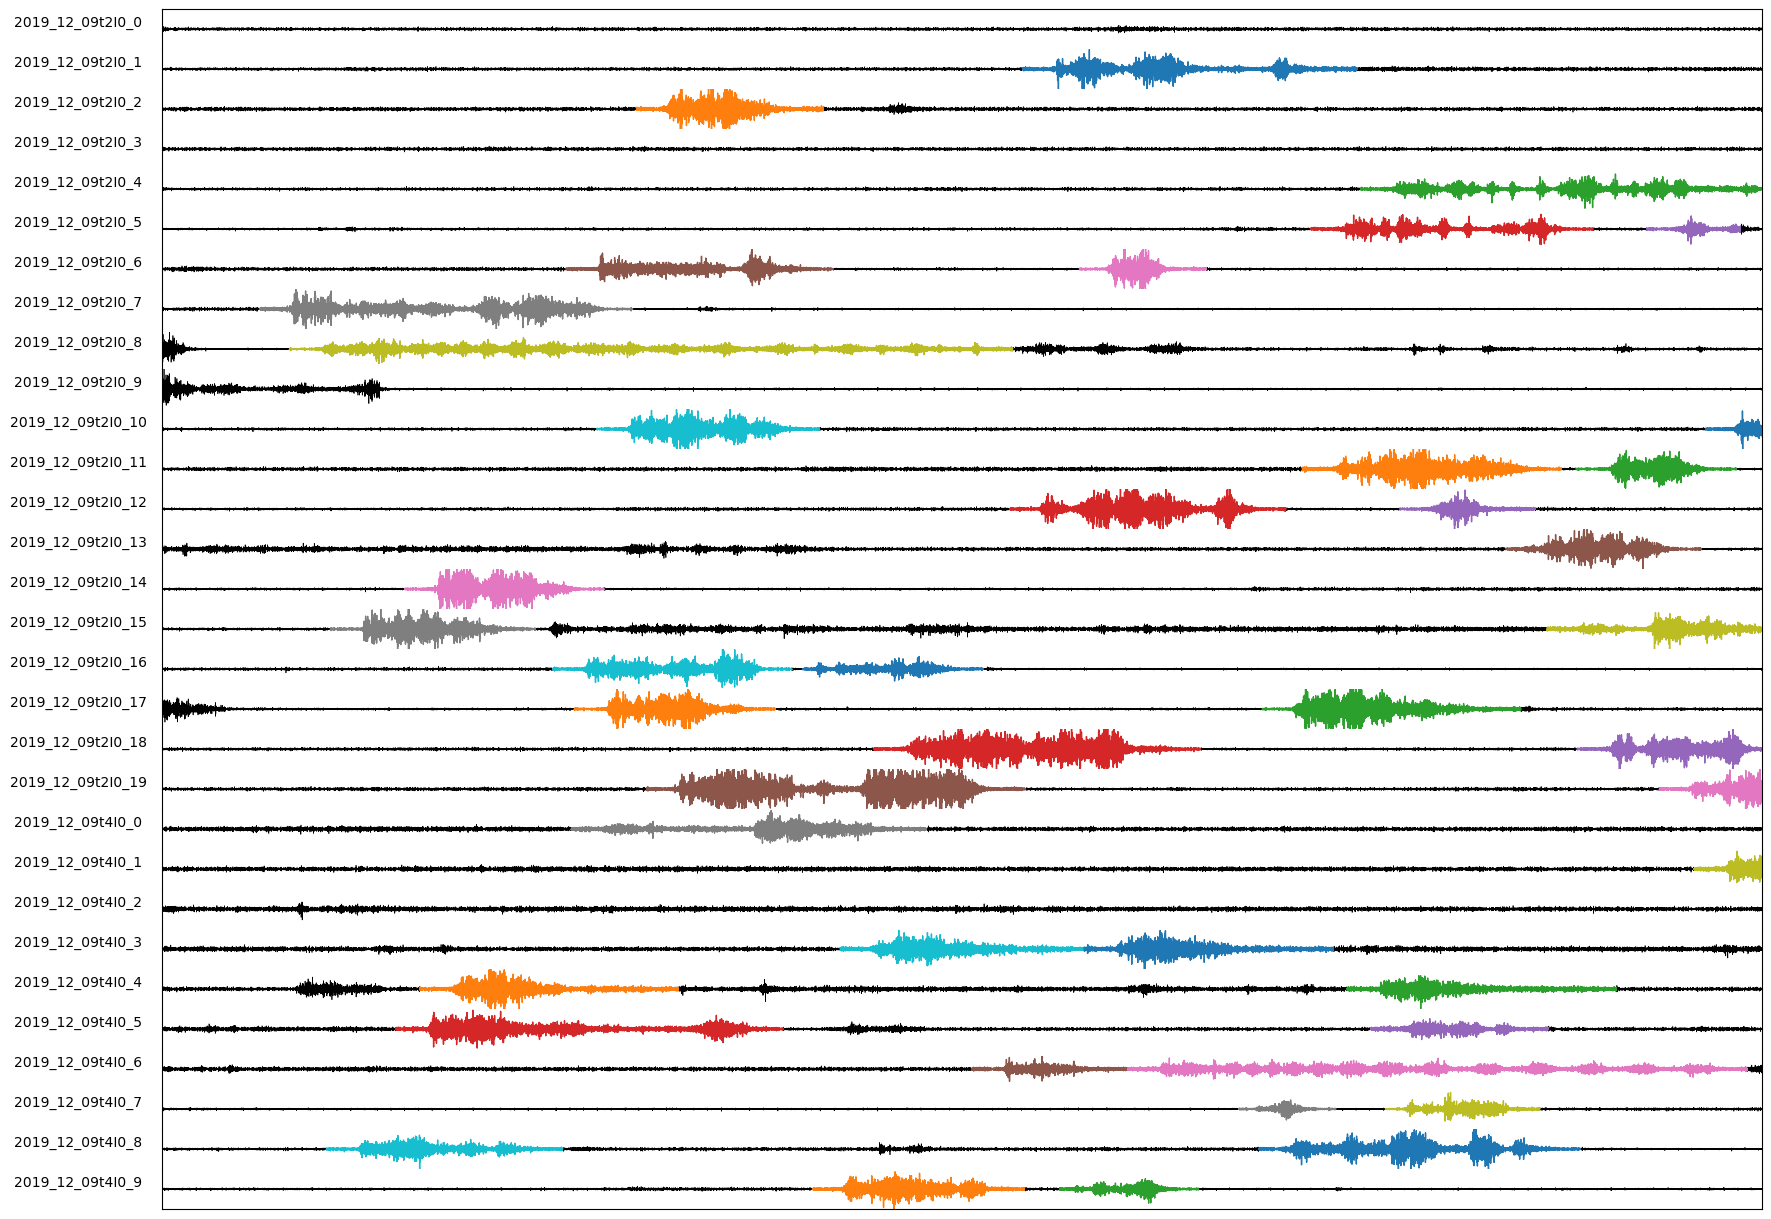

In [5]:
figure, axes = plt.subplots(nrows = len(data.ch_names), figsize = (20, 0.5 * len(data.ch_names)))
plt.subplots_adjust(
    left = 0.1,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0,
    hspace = 0
)

x = data.times

color_list = list(mcolors.TABLEAU_COLORS.keys())

for i, channel in enumerate(data.ch_names):
    move_events = events[events['Channel'] == channel]

    y = data.get_data(picks = [i])[0]

    axes[i].plot(x, y, linewidth = 0.5, color = 'black')
    axes[i].set_ylim(-4, 4)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])
    axes[i].set_ylabel(channel, rotation = 0, labelpad = 60, loc = 'center')
    axes[i].set_xlim(0, 10)

    for index, row in move_events.iterrows():
        start = int(row['EventStart'])
        end = int(row['EventEnd'])
        color = color_list[index % len(color_list)]

        axes[i].plot(x[start:end], y[start:end], linewidth = 1, color = color)

    if i != 0:
        axes[i].spines['top'].set_visible(False)

    if i != len(data.ch_names) - 1:
        axes[i].spines['bottom'].set_visible(False)

plt.show()

# Let's determine the exact movement onset and offset

First, let's select a single event with clearly overestimated onset and offset times.

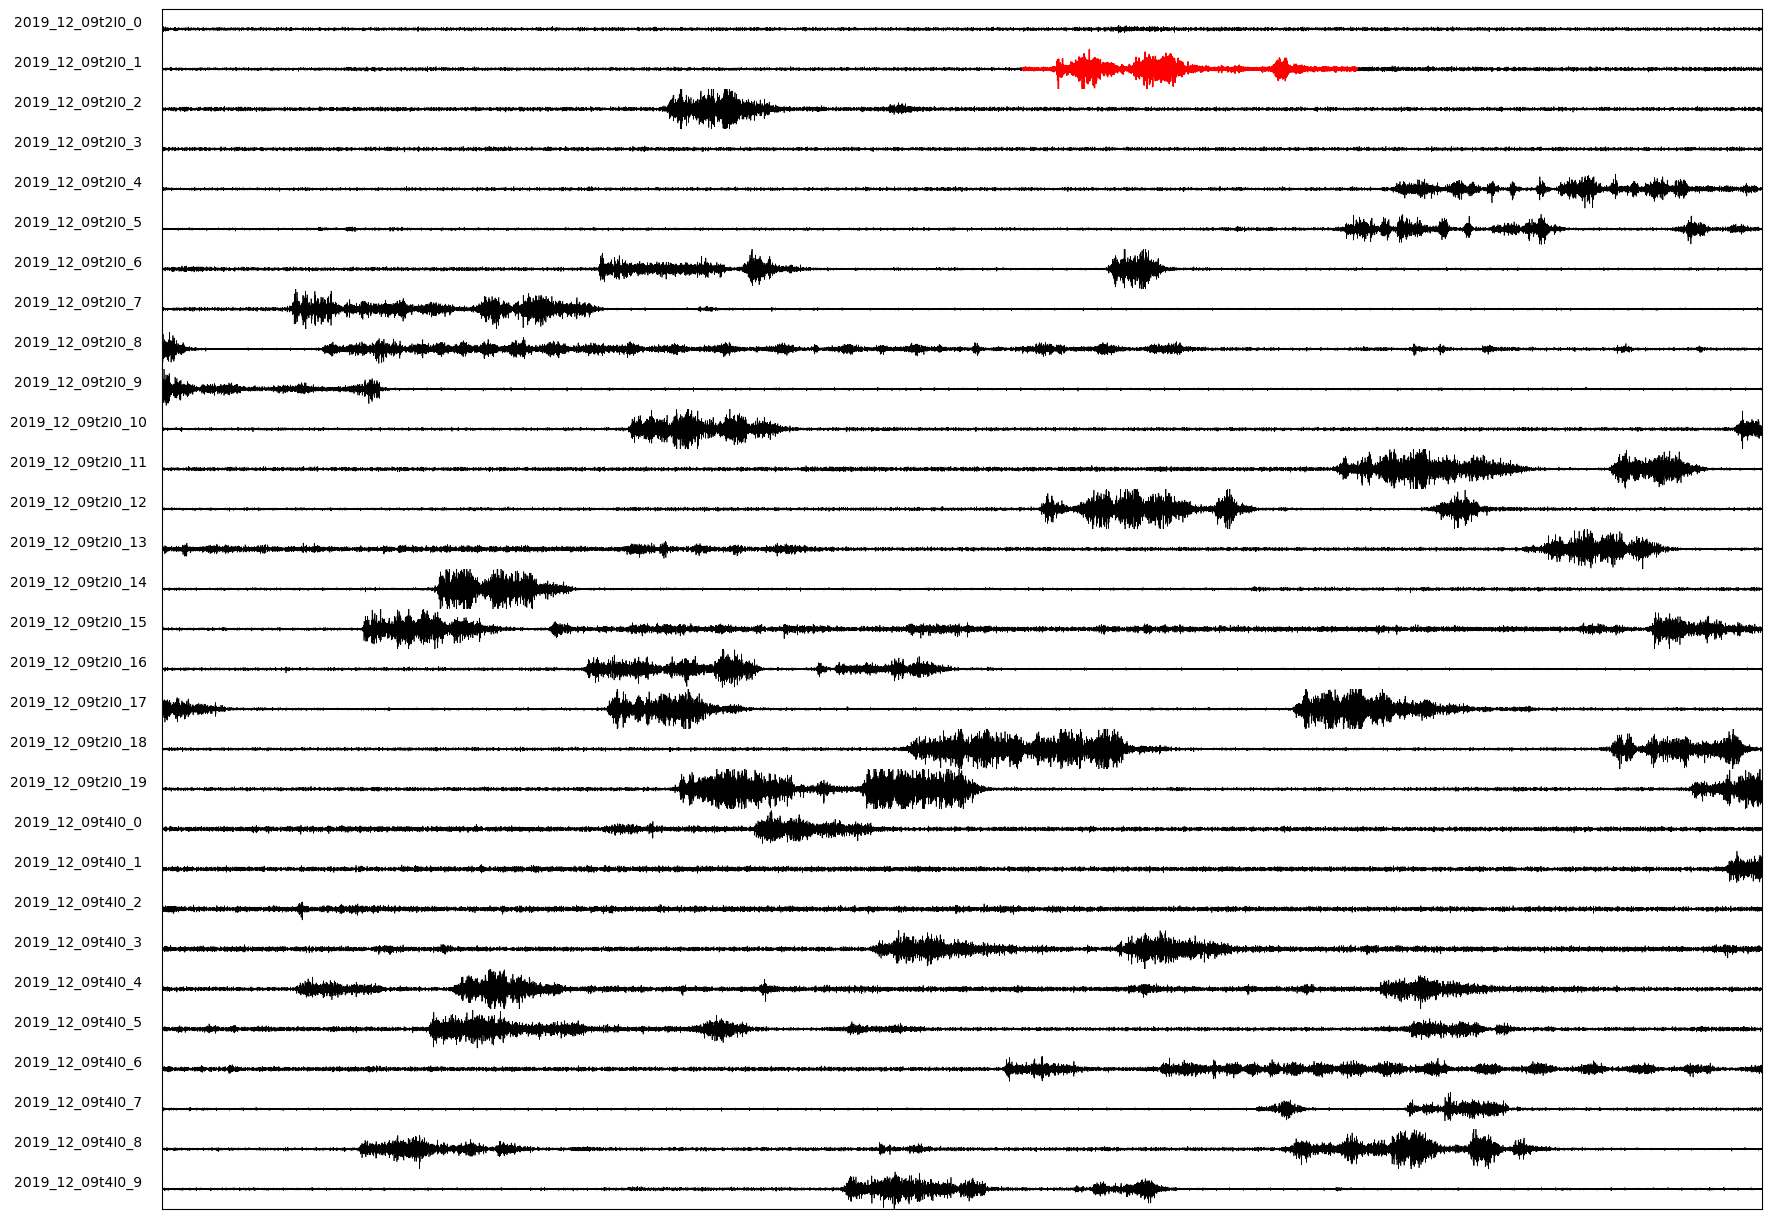

In [6]:
eventId = events[events['Channel'] == data.ch_names[1]].iloc[0]['EventId']

figure, axes = plt.subplots(nrows = len(data.ch_names), figsize = (20, 0.5 * len(data.ch_names)))
plt.subplots_adjust(
    left = 0.1,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0,
    hspace = 0
)

x = data.times

for i, channel in enumerate(data.ch_names):
    move_events = events[events['Channel'] == channel]

    y = data.get_data(picks = [i])[0]

    axes[i].plot(x, y, linewidth = 0.5, color = 'black')
    axes[i].set_ylim(-4, 4)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])
    axes[i].set_ylabel(channel, rotation = 0, labelpad = 60, loc = 'center')
    axes[i].set_xlim(0, 10)

    for index, row in move_events.iterrows():
        if row['EventId'] != eventId: continue
        start = int(row['EventStart'])
        end = int(row['EventEnd'])
        axes[i].plot(x[start:end], y[start:end], linewidth = 1, color = 'red')

    if i != 0:
        axes[i].spines['top'].set_visible(False)

    if i != len(data.ch_names) - 1:
        axes[i].spines['bottom'].set_visible(False)

plt.show()

Good, this is our event.

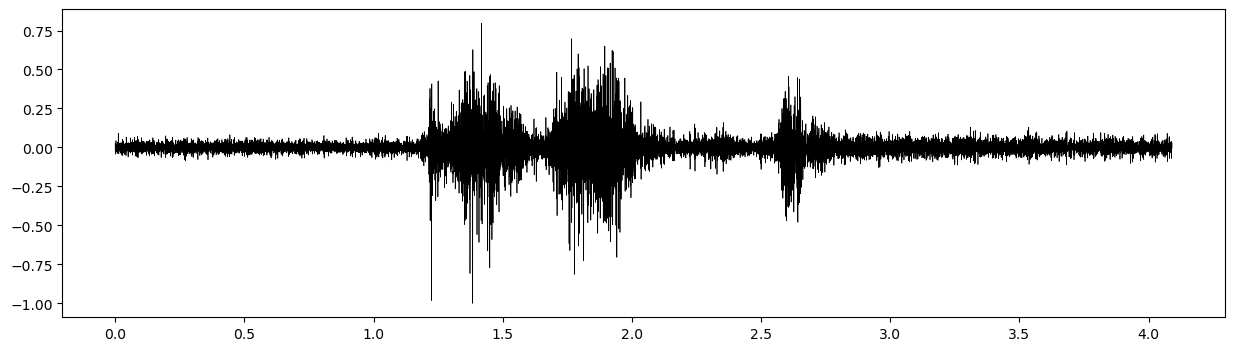

In [7]:
event = events[events['EventId'] == eventId].iloc[0]
channel = event['Channel']
start = event['Start'] - 1
end = event['End'] + 1
# end = event['End']

event_data = data.copy().pick(picks = [channel]).crop(tmin = start, tmax = end)
y = event_data.get_data()[0]
x = event_data.times

plt.figure(figsize = (15, 4))
plt.plot(x, y / np.max(np.abs(y)), linewidth = 0.5, color = 'black')
plt.show()

Let's try to determine exact onset point.

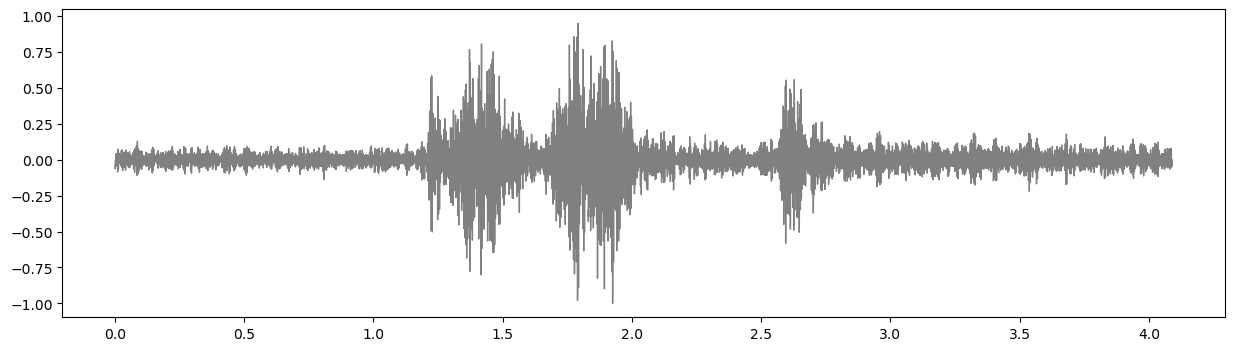

In [8]:
window_size = 45
smooth_y = np.convolve(y, np.ones(window_size) / window_size, mode = 'valid')
smooth_x = np.convolve(x, np.ones(window_size) / window_size, mode = 'valid')

plt.figure(figsize = (15, 4))
plt.plot(smooth_x, smooth_y / np.max(np.abs(smooth_y)), linewidth = 1, color = 'gray')
plt.show()

Before we start... What is the average amplitude of the resting state signal?

Obtained sampling rate: 5000 Hz
Average resting signal amplitude: 0.09005766319772794


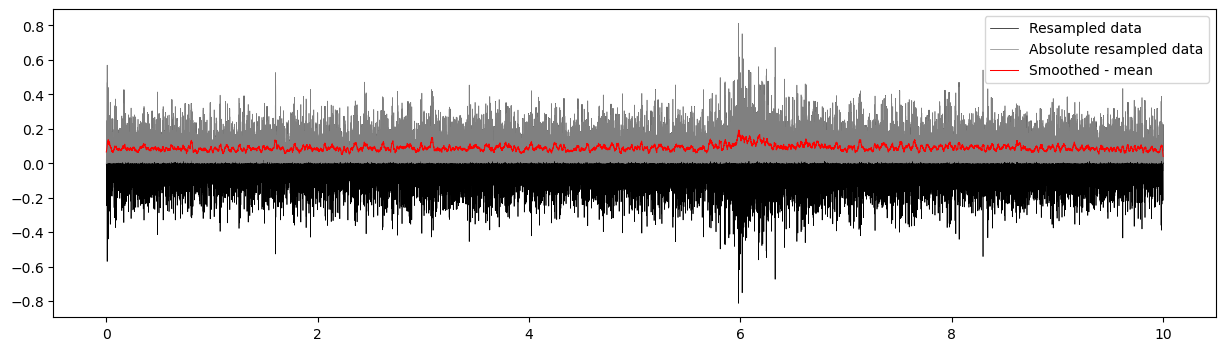

In [9]:
rest_y = data.get_data()[0]
rest_x = data.times

sfreq = 20000

# Resample the data
resample_factor = 4
rest_y = rest_y[::resample_factor]
rest_x = rest_x[::resample_factor]

print(f'Obtained sampling rate: {int(sfreq / resample_factor)} Hz')

# Smooth the signal by rolling average
window_size = 100
rest_smooth_y = np.convolve(np.abs(rest_y), np.ones(window_size) / window_size, mode = 'same')
mean_rest_y = np.mean(rest_smooth_y)
# rest_smooth_y = rest_smooth_y - mean_rest_y

print(f'Average resting signal amplitude: {mean_rest_y}')

plt.figure(figsize = (15, 4))

plt.plot(rest_x, rest_y, linewidth = 0.5, color = 'black', label = 'Resampled data')
plt.plot(rest_x, np.abs(rest_y), linewidth = 0.5, color = 'gray', label = 'Absolute resampled data')
plt.plot(rest_x, rest_smooth_y, linewidth = 0.75, color = 'red', label = 'Smoothed - mean')
plt.legend()
plt.show()

Obtained sampling rate: 5000 Hz


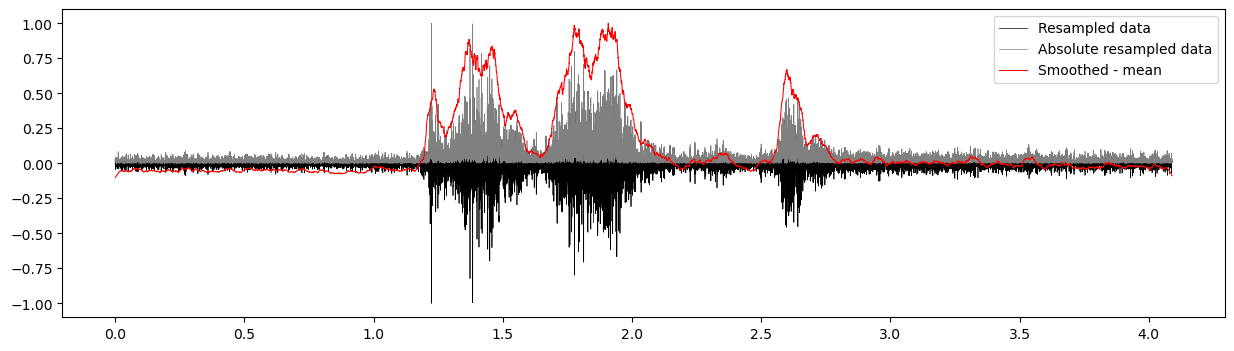

In [10]:
event_data = data.copy().pick(picks = [channel]).crop(tmin = start, tmax = end)
y = event_data.get_data()[0]
x = event_data.times

sfreq = 20000

# Resample the data
resample_factor = 4
y = y[::resample_factor]
x = x[::resample_factor]

print(f'Obtained sampling rate: {int(sfreq / resample_factor)} Hz')

# Smooth the signal by rolling average
window_size = 200
smooth_y = np.convolve(np.abs(y), np.ones(window_size) / window_size, mode = 'same')
smooth_y = smooth_y - 1.5 * mean_rest_y

plt.figure(figsize = (15, 4))

plt.plot(x, y / np.max(np.abs(y)), linewidth = 0.5, color = 'black', label = 'Resampled data')
plt.plot(x, np.abs(y) / np.max(np.abs(y)), linewidth = 0.5, color = 'gray', label = 'Absolute resampled data')
plt.plot(x, smooth_y / np.max(smooth_y), linewidth = 0.75, color = 'red', label = 'Smoothed - mean')
plt.legend()
plt.show()

In [11]:
signal_over_threshold = smooth_y >= 0
change_indices = np.where(np.diff(signal_over_threshold))[0]

movement_data = pd.DataFrame({
    'EventStart': np.insert(change_indices + 1, 0, 0),
    'EventEnd': np.append(change_indices, len(signal_over_threshold))
})

movement_data['Movement'] = signal_over_threshold[movement_data['EventStart']]

# Calculate the movement time in points and merge events
movement_data['EventLength'] = list(movement_data['EventEnd'] - movement_data['EventStart'])
movement_data = movement_data[movement_data['Movement'] == True]

In [12]:
n_est_movements = len(movement_data[movement_data['EventLength'] > 150])
print(f'Number of estimated movements: {n_est_movements}')
movement_data = movement_data[movement_data['EventLength'] > 150]
movement_data = movement_data.reset_index(drop = True)

Number of estimated movements: 12


In [13]:
print('Calculating the average signal amplitude during estimated movements')

for index, movement in movement_data.iterrows():
    start = movement['EventStart']
    end = movement['EventEnd']
    dt = smooth_y[start:end]
    movement_data.at[index, 'Amplitude'] = np.sqrt(np.mean(np.square(dt)))

movement_data = movement_data[movement_data['Amplitude'] > 0.25]
movement_data = movement_data.reset_index(drop = True)

n_est_movements = len(movement_data)
print(f'Number of estimated movements after amplitude filtering: {n_est_movements}')

Calculating the average signal amplitude during estimated movements
Number of estimated movements after amplitude filtering: 2


In [14]:
print(f'Number of estimated movements: {n_est_movements}')

Number of estimated movements: 2


In [15]:
true_movement = movement_data.iloc[1]

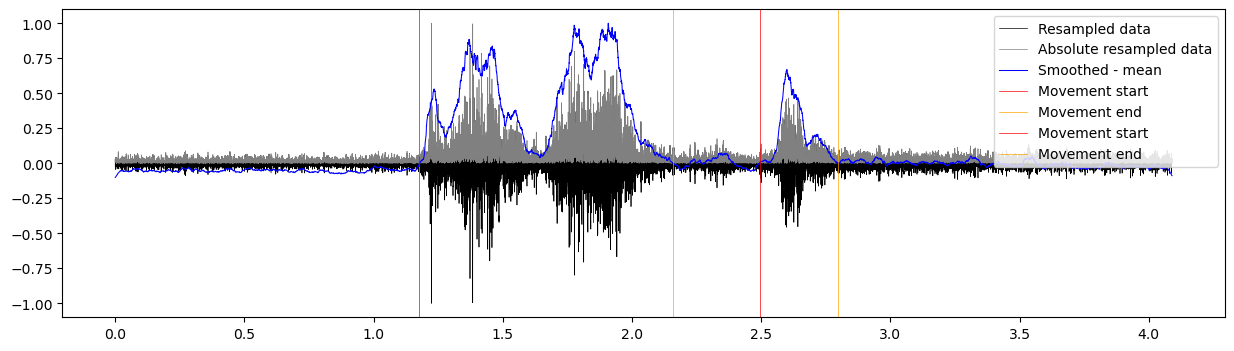

In [16]:
plt.figure(figsize = (15, 4))

plt.plot(x, y / np.max(np.abs(y)), linewidth = 0.5, color = 'black', label = 'Resampled data')
plt.plot(x, np.abs(y) / np.max(np.abs(y)), linewidth = 0.5, color = 'gray', label = 'Absolute resampled data')
plt.plot(x, smooth_y / np.max(smooth_y), linewidth = 0.75, color = 'blue', label = 'Smoothed - mean')

for index, true_movement in movement_data.iterrows():
    plt.axvline(x = x[true_movement['EventStart']], linewidth = 0.5, color = 'red', linestyle = '-', label = 'Movement start')
    plt.axvline(x = x[true_movement['EventEnd']], linewidth = 0.5, color = 'orange', linestyle = '-', label = 'Movement end')

plt.legend(loc = 'upper right')
plt.show()